#### Implementing a Simple Chatbot using Langgraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

#Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv

load_dotenv(override=True)

True

In [4]:
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [5]:
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI

In [6]:
openai_llm = ChatOpenAI(model="gpt-4o-mini")
openai_llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm just a program, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 13, 'total_tokens': 36, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': None, 'id': 'chatcmpl-BvdaCg45IzDwRKFBSEkg2TIExJZer', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2ff160e8-d9ce-44c0-8d82-98fc88eb3ec2-0', usage_metadata={'input_tokens': 13, 'output_tokens': 23, 'total_tokens': 36, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [7]:
groq_llm = ChatGroq(model="llama-3.1-8b-instant")
groq_llm.invoke("Hello, how are you?")

AIMessage(content="I'm functioning properly, thank you for asking. I'm a large language model, so I don't have emotions like humans do, but I'm here and ready to help with any questions or tasks you have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 41, 'total_tokens': 92, 'completion_time': 0.070720982, 'prompt_time': 0.002407938, 'queue_time': 1.218576227, 'total_time': 0.07312892}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'finish_reason': 'stop', 'logprobs': None}, id='run--a77fa46d-b23b-4722-9814-eb71b394079a-0', usage_metadata={'input_tokens': 41, 'output_tokens': 51, 'total_tokens': 92})

In [8]:
## Nodes

In [9]:
def SuperBot(state:State):
    return {"messages": [openai_llm.invoke(state["messages"])]}

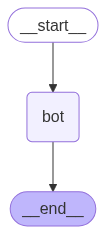

In [10]:
graph = StateGraph(State)

graph.add_node("bot",SuperBot)

graph.add_edge(START,"bot")
graph.add_edge("bot",END)

graph_builder = graph.compile()


display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [11]:
## Graph Invokeation

In [12]:
graph_builder.invoke({"messages":["Hello, how are you?"]})

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='cb59d4a1-c76f-4411-8e4f-3534d4b8daf9'),
  AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': None, 'id': 'chatcmpl-BvdaGZeEhb98WgGCQnrkWr01aUTwz', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--ab09c281-4a0a-400e-9afe-03759bd5237a-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'o

In [13]:
## Streaming the responses
for event in graph_builder.stream({"messages": "Hello, how are you?"}):
    print(event)

{'bot': {'messages': [AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 13, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': None, 'id': 'chatcmpl-BvdaHDEyxY0rBie5ojtWtDI8BXL1j', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b3535f5c-3e3b-4a85-9cab-a9d72ba071f7-0', usage_metadata={'input_tokens': 13, 'output_tokens': 30, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
